# PA 2: Classification - Nearest Neighbors

## Student Details




Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
*10 points per question will be deducted incase you fail to do so*
<br>*DO NOT DELETE THIS CELL*<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn


## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

**Do not upload the database file. Only two files are expected**[-20 points]


## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load Health_care_stroke.csv dataset from datasets.Output/Prediction variable is stroke. [1 points]
* Select best 3 attributes for training and testing your model. [2 points]
* Find the best K using elbow method. Explain what other ways can we use to find the best value of K. [3 points]
* Split your dataset 70% for training, 20% validation and 10% testing for the classifier. Use random state 2030.[2 points]
* Use Minkowski distance and Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[3 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.Explain the classification report in detail and donot copy paste from the internet.**10 points will be deducted if found**[5 points]
* Plot the classifier in a 2D projection.[3 points]

In [3]:

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# To split dataset for training and testing and validation
from sklearn.model_selection import train_test_split

#Import accuracy_score, confusion_matrix , classification_report from scikit-learn metrics module
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

# importing knnclassifier ,its negihbours and datasets
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# import standard scalar utils Normalizing the data which will be usefull for better fit and predictions
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils


In [4]:
# 1) Load Health_care_stroke.csv dataset from datasets.Output/Prediction variable is stroke. 
# converting the data into a dataFrame
#read the csv file into a Pandas data frame

heart = pd.read_csv('healthcare_stroke_dataset.csv')
heart_data = pd.DataFrame(heart)

In [5]:
# checking out for null value count in every column

for n in list(heart_data.columns.values):
    print (n,": ",sum(pd.isnull(heart_data[n]))) 


id :  0
date :  0
gender :  0
age :  0
hypertension :  0
heart_disease :  0
ever_married :  0
work_type :  0
Residence_type :  0
avg_glucose_level :  0
bmi :  201
smoking_status :  0
stroke :  0


In [6]:
#dropping few coloumns to classify data for later use
heart_data = pd.DataFrame(heart)
heart_data = heart_data.drop(['id','date','Residence_type','smoking_status','hypertension','ever_married','work_type'], axis = 1)

heart_data.head()

,gender,age,heart_disease,avg_glucose_level,bmi,stroke
0,Male,67.0,1,228.69,36.6,1
1,Female,61.0,0,202.21,NaN,1
2,Male,80.0,1,105.92,32.5,1
3,Female,49.0,0,171.23,34.4,1
4,Female,79.0,0,174.12,24.0,1


In [7]:

#filling the null values with mean value,,, here mean was calculated by grouping age attribute
#so if a particular person is of age 61 we get the mean of bmi of people whose age is 61 and use it  
#done this for efficeny and preventing data loss

heart_data['bmi'] = heart_data['bmi'].fillna(heart_data.groupby('age')['bmi'].transform('mean'))
heart_data['bmi'] = heart_data['bmi'].fillna(heart_data['bmi'].mean())
A1 = heart_data.drop(['gender','heart_disease','stroke','avg_glucose_level'], axis = 1).values


heart_data.head()


,gender,age,heart_disease,avg_glucose_level,bmi,stroke
0,Male,67.0,1,228.69,36.60,1
1,Female,61.0,0,202.21,30.19,1
2,Male,80.0,1,105.92,32.50,1
3,Female,49.0,0,171.23,34.40,1
4,Female,79.0,0,174.12,24.00,1


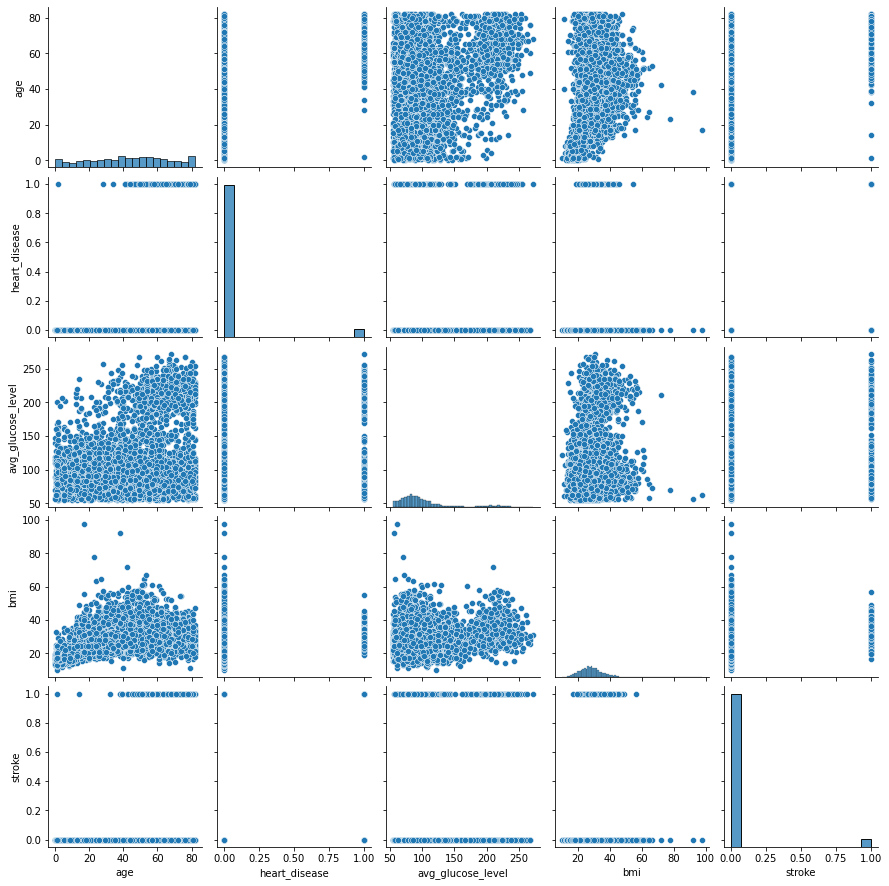

In [8]:
sns.pairplot(heart_data)

In [9]:
# 2) Select best 3 attributes for training and testing your model. [2 points]
#ARRAY a has age,avg_glucose_level and bmi

A = heart_data.drop(['gender','heart_disease','stroke'], axis = 1).values
#using stroke at target variable
B = heart_data.stroke

A

array([[ 67.  , 228.69,  36.6 ],
       [ 61.  , 202.21,  30.19],
       [ 80.  , 105.92,  32.5 ],
       ...,
       [ 35.  ,  82.99,  30.6 ],
       [ 51.  , 166.29,  25.6 ],
       [ 44.  ,  85.28,  26.2 ]])

In [10]:
# 4) Split your dataset 70% for training, 20% validation and 10% testing for the classifier. Use random state 2030.[2 points]
# making training data set size as 0.7 with random_state = 2030 and rem represents remaining data presents 


train_size = 0.7
A_train, A_rem, B_train, B_rem = train_test_split(A, B, train_size = 0.7, random_state = 2030)

# Now since we want the valid and test size to be 20% and 10% of overall remaining data. 
# with random_state = 2030 we make test size to 0.333 as its just 10 percent out total data 
#, i.e., 30 percent out of remaining data

test_size = 0.3333
A_valid, A_test, B_valid, B_test = train_test_split(A_rem, B_rem, test_size = 0.3333, random_state = 2030)

#printing data data shape , rows and cols of training,validation and testing data sets
print("Training data -", A_train.shape)
print("Validation data -", A_valid.shape)
print("Testing data -", A_test.shape)

Training data - (3577, 3)
Validation data - (1022, 3)
Testing data - (511, 3)


In [11]:
# Normalizing the data which will be usefull for better fit and predictions
# preprocessing data, standardizing the data sets A which contians 3 attributes
sd = StandardScaler()
sd.fit(A_train)
A_train = sd.transform(A_train)
A_test = sd.transform(A_test)


In [12]:
#3) Find the best K using elbow method. Explain what other ways can we use to find the best value of K


#5) Use Minkowski distance and Euclidean distance.[3 points]
# Calculating the accuracy, confusion matrix ,classifcation report


# function was defined in order to get the kvalue for euclidean distance
#K using elbow method
def knn_E(n_neighbors):
  knn_E = KNeighborsClassifier(n_neighbors=n_neighbors, metric = 'euclidean', p = 2)   
  # powerfactor=2 represents eucliedian distance and metric is euclidean
  knn_E.fit(A_train,B_train)                                     
  #sending training values of x and y into fit function
  B_pred = knn_E.predict(A_test)
  # printing accuray, confusion matrix, classification report containing precision ,recall,f1-score,support
  print("confusion_matrix when k=", n_neighbors,"\n",confusion_matrix(B_test, B_pred))
  print("classification_reportwhen k=", n_neighbors,"\n", classification_report(B_test, B_pred))
  print("Accuracy when k=",n_neighbors,"\n", accuracy_score(B_test,B_pred))
  #plot classifier in 2D for knn euclidean
  plot_knn(n_neighbors, A1,B,knn_E)
  

In [13]:
# function was defined in order to get the kvalue for euclidean distance
#K using elbow method
def knn_M(n_neighbors):
  knn_M = KNeighborsClassifier(n_neighbors=n_neighbors,metric = 'minkowski', p = 10)  
  #powerfactor>2 represents minskowski distance and metric is minskowski
  knn_M.fit(A_train,B_train)                               
  #sending training values of x and y into fit function
  B_pred = knn_M.predict(A_test)
  # printing accuray, confusion matrix, classification report containing precision ,recall,f1-score,support
  print("confusion_matrix when k=", n_neighbors,"\n",confusion_matrix(B_test, B_pred))
  print("classification_report when k=", n_neighbors,"\n", classification_report(B_test, B_pred))
  print("Accuracy when k=",n_neighbors,"\n", accuracy_score(B_test,B_pred))
  #plot classifier in 2D for knn minkowski
  plot_knn(n_neighbors,A1,B,knn_M)



In [14]:
#defining a plot fucntion which will give us 2d plot of classifiers
def plot_knn(n_neighbours,x,y,clf):
    h = 0.2
    # Creating color maps
    
    cmap_light = ListedColormap(["CYAN","BLUE"])
    cmap_bold = ListedColormap(["RED","GREEN","GRAY"])
    
    # fitting the data.
    clf.fit(x, y)

    # calculating the  minimum, maximum and limits
    min_x, max_x = x[:, 0].min() - 1, x[:, 0].max() + 1
    min_y, max_y = x[:, 1].min() - 1, x[:, 1].max() +1
    x_f, y_f = np.meshgrid(np.arange(min_x, max_x, h),
    np.arange(min_y, max_y, h))
      
    # predicting using the classifer
    f = clf.predict(np.c_[x_f.ravel(), y_f.ravel()])

    # color plot
    f = f.reshape(x_f.shape)
    plt.figure()
    plt.pcolormesh(x_f, y_f, f, cmap=cmap_light, shading='auto')

    # Plotting
    plt.scatter(x[:, 0], x[:, 1], c=y , cmap=cmap_bold)
    plt.xlim(x_f.min(), x_f.max())
    plt.ylim(y_f.min(), y_f.max())
    plt.title("Classification (k = %i)" % (n_neighbours))
    plt.show()

In [15]:
#6) Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
#testing knn classifiers for 3 diffrent neigbours for both euclidean and minskowski via functions

# 8) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, 
# f1-score, and support) for all three different numbers.

# 9) Plot the classifier in a 2D projection.[3 points] 



KNN - EUCLIDEAN DISTANCE -- WHERE K = 1
confusion_matrix when k= 1 
 [[460  26]
 [ 22   3]]
classification_reportwhen k= 1 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       486
           1       0.10      0.12      0.11        25

    accuracy                           0.91       511
   macro avg       0.53      0.53      0.53       511
weighted avg       0.91      0.91      0.91       511

Accuracy when k= 1 
 0.9060665362035225


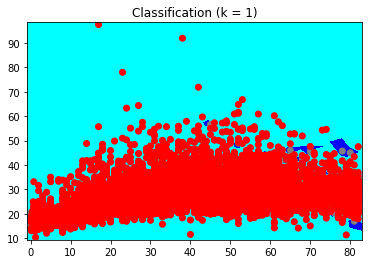

KNN - MINKOWSKI DISTANCE -- WHERE K = 1
confusion_matrix when k= 1 
 [[460  26]
 [ 21   4]]
classification_report when k= 1 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       486
           1       0.13      0.16      0.15        25

    accuracy                           0.91       511
   macro avg       0.54      0.55      0.55       511
weighted avg       0.92      0.91      0.91       511

Accuracy when k= 1 
 0.9080234833659491


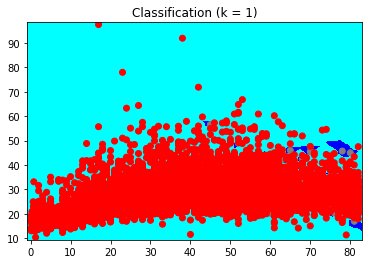

In [16]:
print("KNN - EUCLIDEAN DISTANCE -- WHERE K = 1"),
knn_E(1),
print("====================================================================================="),
print("KNN - MINKOWSKI DISTANCE -- WHERE K = 1"),
knn_M(1)

KNN - EUCLIDEAN DISTANCE -- WHERE K = 5
confusion_matrix when k= 5 
 [[481   5]
 [ 24   1]]
classification_reportwhen k= 5 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       486
           1       0.17      0.04      0.06        25

    accuracy                           0.94       511
   macro avg       0.56      0.51      0.52       511
weighted avg       0.91      0.94      0.93       511

Accuracy when k= 5 
 0.9432485322896281


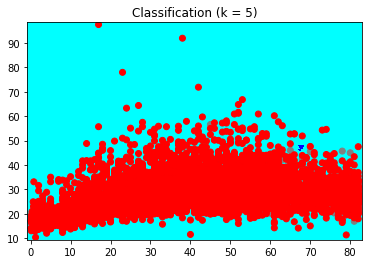

KNN - MINKOWSKI DISTANCE -- WHERE K = 5
confusion_matrix when k= 5 
 [[483   3]
 [ 24   1]]
classification_report when k= 5 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       486
           1       0.25      0.04      0.07        25

    accuracy                           0.95       511
   macro avg       0.60      0.52      0.52       511
weighted avg       0.92      0.95      0.93       511

Accuracy when k= 5 
 0.9471624266144814


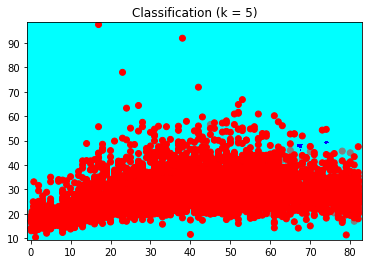

In [17]:
print("KNN - EUCLIDEAN DISTANCE -- WHERE K = 5"),
knn_E(5),
print("====================================================================================="),
print("KNN - MINKOWSKI DISTANCE -- WHERE K = 5"),
knn_M(5)

KNN - EUCLIDEAN DISTANCE -- WHERE K = 8
confusion_matrix when k= 10 
 [[486   0]
 [ 25   0]]
classification_reportwhen k= 10 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       486
           1       0.00      0.00      0.00        25

    accuracy                           0.95       511
   macro avg       0.48      0.50      0.49       511
weighted avg       0.90      0.95      0.93       511

Accuracy when k= 10 
 0.9510763209393346


C:\Users\Puddi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Puddi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Puddi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


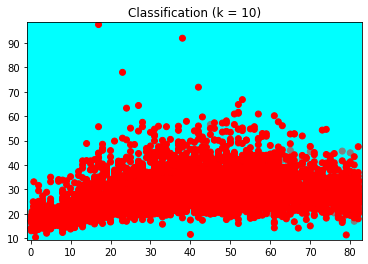

KNN - MINKOWSKI DISTANCE -- WHERE K = 8
confusion_matrix when k= 10 
 [[486   0]
 [ 25   0]]
classification_report when k= 10 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       486
           1       0.00      0.00      0.00        25

    accuracy                           0.95       511
   macro avg       0.48      0.50      0.49       511
weighted avg       0.90      0.95      0.93       511

Accuracy when k= 10 
 0.9510763209393346


C:\Users\Puddi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Puddi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Puddi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


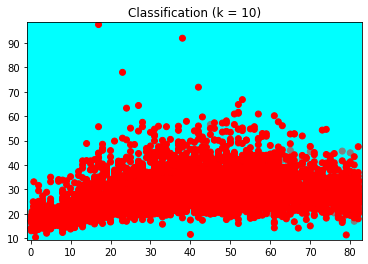

In [18]:
print("KNN - EUCLIDEAN DISTANCE -- WHERE K = 10"),
knn_E(10),
print("====================================================================================="),
print("KNN - MINKOWSKI DISTANCE -- WHERE K = 10"),
knn_M(10)

In [19]:
#8)Plot the Error rate vs. K-value.
#Explain the classification report in detail and donot copy paste from the internet.
#10 points will be deducted if found[5 points]



In [20]:


#EUCLIDEAN DISTANCE 
#plotting a graph with acccuracies and k value 
#calculating the distance error rate and k value and plotting it



In [21]:
# calculating the accuracies for k values 1- 15 for plotting graph against the accuracies and k values
# for euclidean distance
k_range=range(1,15)           
#from k value 1 to 15
scores={}
scores_list=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean',p = 2)
    #calculating for k values in range and p=2 represents euclidien distance
    knn.fit(A_train,B_train) #`sending training values of x and y into fit function
    B_pred=knn.predict(A_test) #used for making prediction
    scores[k]=metrics.accuracy_score(B_test,B_pred) #calculating accuracy
    scores_list.append(metrics.accuracy_score(B_test,B_pred))  #appending scores to scores_list
 

Text(0, 0.5, 'Testing Accuracy')

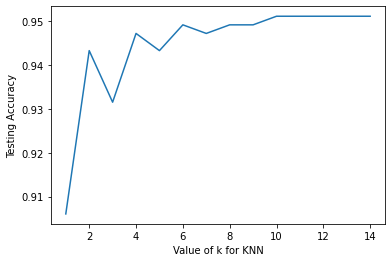

In [22]:
#plotting graph for kvalue and accuracies for euclidean
plt.plot(k_range,scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')       

Text(0, 0.5, 'Error Rate')

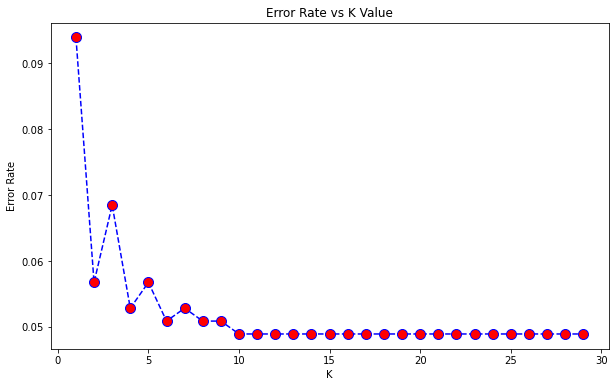

In [23]:
# calculating the error rate for k values 

error_rate =[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i,metric = 'euclidean',p=2)  #calculating for k values in range and p=2 represents euclidean distance
    knn.fit(A_train, B_train)  #`sending training values of x and y into fit function
    pred_i = knn.predict(A_test)  #used for making prediction
    error_rate.append(np.mean(pred_i != B_test)) #calculating error rate by means of mean and plotting
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate, color ='blue', linestyle= 'dashed', marker= 'o', markerfacecolor='red', markersize= 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:

#MINKOWSKI DISTANCE 
#plotting a graph with acccuracies and k value 
#calculating the distance error rate and k value and plotting it


In [25]:
# calculating the accuracies for k values for plotting graph against the accuracies and k values
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range=range(1,15)           #from k value 1 to 15
scores={}
scores_list=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'minkowski',p=10) #calculating for k values in range and p>2 represents minkowski distance
    knn.fit(A_train,B_train) #`sending training values of x and y into fit function
    B_pred=knn.predict(A_test) #used for making prediction
    scores[k]=metrics.accuracy_score(B_test,B_pred) #calculating accuracy
    scores_list.append(metrics.accuracy_score(B_test,B_pred))  #appending scores to scores_list
 

Text(0, 0.5, 'Testing Accuracy')

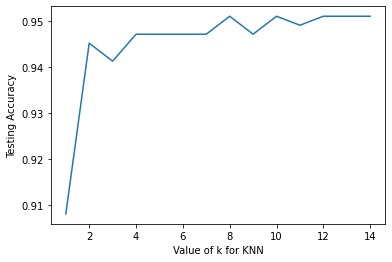

In [26]:
#plotting graph for kvalue and accuracies for euclidean
plt.plot(k_range,scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')    


Text(0, 0.5, 'Error Rate')

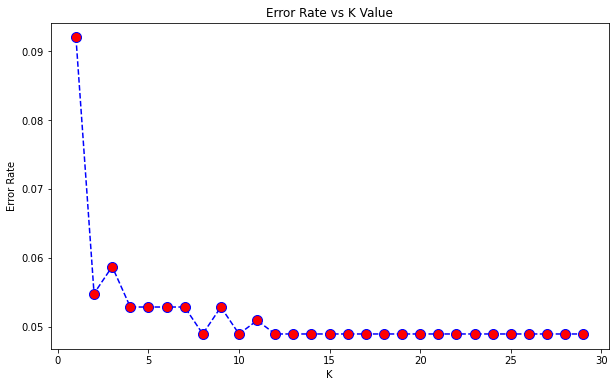

In [27]:
# calculating the error rate for k values 

error_rate =[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=10)  #calculating for k values in range and p>2 represents minkowski distance
    knn.fit(A_train, B_train)  #`sending training values of x and y into fit function
    pred_i = knn.predict(A_test) #used for making prediction
    error_rate.append(np.mean(pred_i != B_test)) #calculating error rate by means of mean and plotting
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate, color ='blue', linestyle= 'dashed', marker= 'o', markerfacecolor='red', markersize= 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Report (23 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Explain all the preprocessing done in detail.[4 points]
* Explain all the parameters of KNN in details in your own words. Do not copy paste. Give references. 10 Points will be deducted if you copy paste from the internet. [5 points]
* Explain what was your criteria for selecting the three attributes. [5 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [4 points]
* Interprete and compare the results explain in details.[5 points]

Do not to forget to cite your sources!

## <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>

3) Find the best K using elbow method. Explain what other ways can we use to find the best value of K

for euclidean distance
As we can observe from the above graph error rate starts to decrease and stabilizes from 10 (approx.).
and accuracies doesnt increase too
so, the best value of K should be around 10 and above for most accurate results.

for minkowski distance
As we can observe from the above graph error rate starts to decrease and stabilizes from 12 (approx.). 
and accuracies doesnt increase too
so, the best value of K should be around 12 and above for most accurate results.

We can use Silhouette Method which can be used for validation to find optimal k value instead
so when elbow method gives of diffrent k values for diffrent datasets fronm the same sample we cna use silhouette 
to validate and get optimal k, its just for validating elbow, Cant really say its an alternative to Elbow method


4) Explain the classification report in detail 

In machine learning, a classification report is a performance evaluation indicator. 
It is used to demonstrate your trained classification model's precision, recall, F1 Score, and support.

Metrics:
Precision:
Here for k = 1 the precision is  0.96 and has an effect on the model

Recall: 
There is recall value of 1 for k= 1 which states that there are no false positives in the model

f1-Score:
    Both the k values k=5 and k = 10 has same F1 score which is 0.97 which is near to 1.0 and considering this f1-score
    both criterions have better performance on the model

Support:

For each K value the support diagonized the evaluation process with the same number of occurences for k=5 and K=10 but the precision is good for k = 10

If we compare both the tree models we could confirm that  k=10 will give the best expected performance of the model



